# 最短路径算法

## Dijkstra's Algorithm

In [1]:
import networkx as nx
import random
from utils import PriorityQueue
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edge('A', 'B', weight=1)
G.add_edge('B', 'C', weight=2)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=10)
G.add_edge('A', 'E', weight=7)
G.add_edge('D', 'E', weight=8)
G.add_edge('F', 'E', weight=3)
G.add_edge('G', 'E', weight=2)
G.add_edge('G', 'H', weight=6)
G.add_edge('D', 'H', weight=4)
G.add_edge('G', 'F', weight=3)

edge_labels = dict([((u, v, ), d['weight']) for u, v, d in G.edges(data=True)])

In [3]:
pos = nx.kamada_kawai_layout(G)

In [4]:
def draw_graph(hl_node=None, hl_edges=[], edge_labels=edge_labels):
    nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='grey')
    nx.draw_networkx_nodes(G, pos, hl_node, node_size=500, node_color='b')
    nx.draw_networkx_edges(G, pos, edgelist=hl_edges, edge_color='r')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

/home/tan/.conda/envs/graph/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


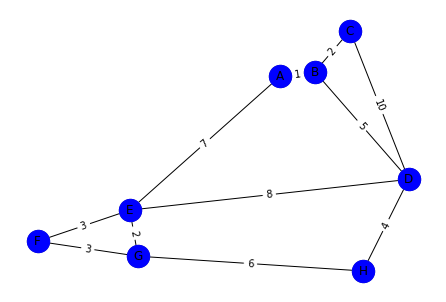

In [5]:
draw_graph()

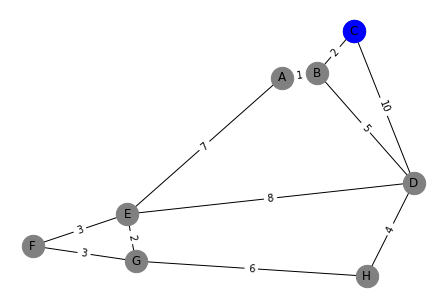

ref [(2, 'B'), (10, 'D')]
came from {'B': 'C', 'D': 'C'}
dist {'C': 0, 'B': 2, 'D': 10}


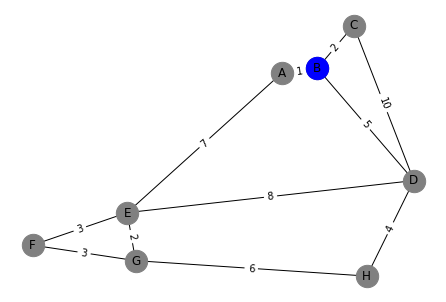

ref [(3, 'A'), (10, 'D'), (7, 'D')]
came from {'B': 'C', 'D': 'B', 'A': 'B'}
dist {'C': 0, 'B': 2, 'D': 7, 'A': 3}


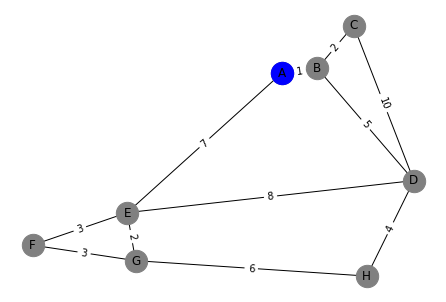

ref [(7, 'D'), (10, 'D'), (10, 'E')]
came from {'B': 'C', 'D': 'B', 'A': 'B', 'E': 'A'}
dist {'C': 0, 'B': 2, 'D': 7, 'A': 3, 'E': 10}


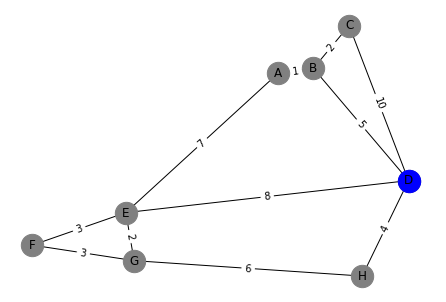

ref [(10, 'D'), (10, 'E'), (11, 'H')]
came from {'B': 'C', 'D': 'B', 'A': 'B', 'E': 'A', 'H': 'D'}
dist {'C': 0, 'B': 2, 'D': 7, 'A': 3, 'E': 10, 'H': 11}


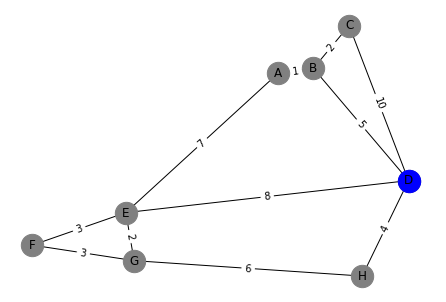

ref [(10, 'E'), (11, 'H')]
came from {'B': 'C', 'D': 'B', 'A': 'B', 'E': 'A', 'H': 'D'}
dist {'C': 0, 'B': 2, 'D': 7, 'A': 3, 'E': 10, 'H': 11}


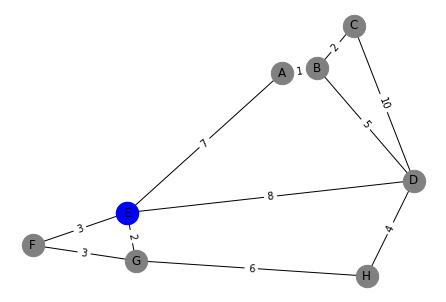

ref [(11, 'H'), (13, 'F'), (12, 'G')]
came from {'B': 'C', 'D': 'B', 'A': 'B', 'E': 'A', 'H': 'D', 'F': 'E', 'G': 'E'}
dist {'C': 0, 'B': 2, 'D': 7, 'A': 3, 'E': 10, 'H': 11, 'F': 13, 'G': 12}


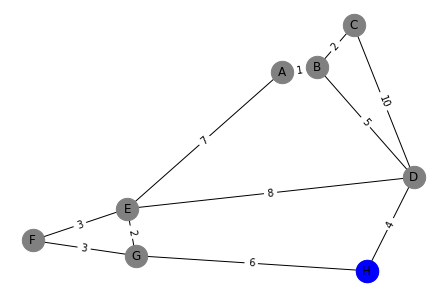

In [6]:
source = 'C'
goal = 'H'

ref_nodes = PriorityQueue()
ref_nodes.put(source, 0)
dist_so_far = {}
came_from = {}
dist_so_far[source] = 0

while not ref_nodes.empty():
    current = ref_nodes.get()
    draw_graph(current)
    import time
    time.sleep(3)

    if current == goal:
        break
    
    for next_node in G.neighbors(current):
        new_dist = dist_so_far[current] + G[current][next_node]['weight']
        if next_node not in dist_so_far or new_dist < dist_so_far[next_node]:
            dist_so_far[next_node] = new_dist
            ref_nodes.put(next_node, new_dist)
            came_from[next_node] = current
    print('ref', ref_nodes.elements)
    print('came from', came_from)
    print('dist', dist_so_far)



In [7]:
print(came_from)

{'B': 'C', 'D': 'B', 'A': 'B', 'E': 'A', 'H': 'D', 'F': 'E', 'G': 'E'}
